<a href="https://colab.research.google.com/github/priyariyyer/AIML_Projects/blob/main/StockPricePrediction_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Gathering

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/AAPL.csv')
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


##Intuitive Data Modifications

In [ ]:
df = df['close']
df

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960
...,...
1253,314.960
1254,313.140
1255,319.230
1256,316.850


## Data Quality Checks

In [ ]:
df.dtype

dtype('float64')

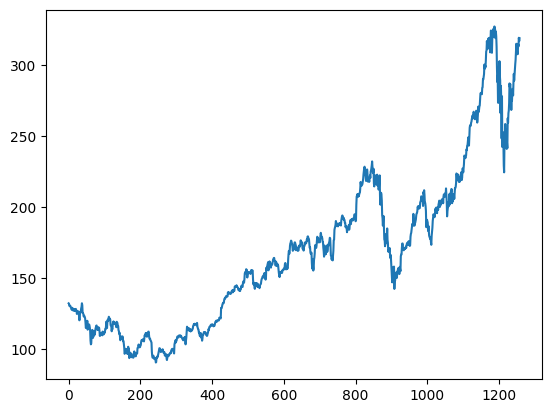

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df)

## Missing Data Handling

In [ ]:
df.isnull().sum()

np.int64(0)

##Outlier Handling



In [ ]:
#Since its a stock price dataset, there is no data considered as outlier.

##Feature Scaling

In [ ]:
#scale down the values as they are big for prediction using model
import numpy as np
from sklearn.preprocessing import MinMaxScaler #Standard scaler is used for making the data into normal distribution. Here we are only scaling values down
scaler = MinMaxScaler(feature_range=(0,1))

df = scaler.fit_transform(np.array(df).reshape(-1,1)) #make the dataset in 2D for LSTM model
df


array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

##Create Train & Test Data

In [ ]:
#since its a time series analysis where sequence of data points has significance, we cannot use train_test_split to create training and test data.
#hence manually split data so that sequence of data is maintained

train_size = int(len(df)*0.65) #65% for training data
test_size = len(df) - train_size #35% for test data

train_data, test_data = df[0:train_size,:], df[train_size:len(df),:1]
train_data.shape, test_data.shape

((817, 1), (441, 1))

In [ ]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [ ]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [ ]:
#Change dataset into required format for TimeSeries
def create_dataset(data, time_step=1):
  dataX, dataY = [], []
  for i in range(len(data)- time_step):
    a = data[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(data[i+time_step,0])
  return np.array(dataX), np.array(dataY)



In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data,time_step)

(array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
         0.09085536],
        [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
         0.0873934 ],
        [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
         0.09030651],
        ...,
        [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
         0.51920966],
        [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
         0.53719497],
        [0.32694419, 0.32230009, 0.32951955, ..., 0.51920966, 0.53719497,
         0.52824453]]),
 array([0.0873934 , 0.09030651, 0.09891919, 0.09887697, 0.10622309,
        0.1213375 , 0.10529427, 0.10221228, 0.12213966, 0.12745926,
        0.1231107 , 0.1302035 , 0.13607194, 0.13366546, 0.1291058 ,
        0.12969687, 0.12762813, 0.1115849 , 0.10879845, 0.1071519 ,
        0.09288187, 0.10062906, 0.09858144, 0.11378029, 0.12007093,
        0.12226632, 0.11572237, 0.12049312, 0.1169045 , 0.11597568,
 

In [ ]:
x_train[0]

array([0.17607447, 0.17495567, 0.16862282, 0.1696994 , 0.16727181,
       0.16794731, 0.16473866, 0.16174111, 0.1581525 , 0.15654817,
       0.16271215, 0.1614878 , 0.1554927 , 0.15443722, 0.15730811,
       0.15604154, 0.15849025, 0.15308621, 0.15735033, 0.15490163,
       0.15946129, 0.15688592, 0.1537195 , 0.14434687, 0.14812547,
       0.15308621, 0.15241071, 0.15055307, 0.14924428, 0.13607194,
       0.12551718, 0.13906949, 0.14911762, 0.14890653, 0.15401503,
       0.16115005, 0.16583636, 0.17618002, 0.17060711, 0.14725998,
       0.14700667, 0.14422021, 0.13691632, 0.13949168, 0.13784514,
       0.13522756, 0.13071012, 0.11863548, 0.10259225, 0.1058009 ,
       0.10466098, 0.10630752, 0.12403952, 0.09773706, 0.10512539,
       0.10474542, 0.10816516, 0.11323144, 0.11044499, 0.10415435,
       0.09419066, 0.06510175, 0.05395592, 0.0565735 , 0.08169383,
       0.09533058, 0.09689268, 0.09465507, 0.07337668, 0.09288187,
       0.08456472, 0.07992063, 0.09275521, 0.0836359 , 0.09385

In [ ]:
y_train[0]

np.float64(0.08739339694334208)

In [ ]:
x_train[1]

array([0.17495567, 0.16862282, 0.1696994 , 0.16727181, 0.16794731,
       0.16473866, 0.16174111, 0.1581525 , 0.15654817, 0.16271215,
       0.1614878 , 0.1554927 , 0.15443722, 0.15730811, 0.15604154,
       0.15849025, 0.15308621, 0.15735033, 0.15490163, 0.15946129,
       0.15688592, 0.1537195 , 0.14434687, 0.14812547, 0.15308621,
       0.15241071, 0.15055307, 0.14924428, 0.13607194, 0.12551718,
       0.13906949, 0.14911762, 0.14890653, 0.15401503, 0.16115005,
       0.16583636, 0.17618002, 0.17060711, 0.14725998, 0.14700667,
       0.14422021, 0.13691632, 0.13949168, 0.13784514, 0.13522756,
       0.13071012, 0.11863548, 0.10259225, 0.1058009 , 0.10466098,
       0.10630752, 0.12403952, 0.09773706, 0.10512539, 0.10474542,
       0.10816516, 0.11323144, 0.11044499, 0.10415435, 0.09419066,
       0.06510175, 0.05395592, 0.0565735 , 0.08169383, 0.09533058,
       0.09689268, 0.09465507, 0.07337668, 0.09288187, 0.08456472,
       0.07992063, 0.09275521, 0.0836359 , 0.09385291, 0.10077

In [ ]:
y_train[1]

np.float64(0.0903065101747868)

In [ ]:
x_test, y_test = create_dataset(test_data, time_step)
x_test[0]

array([0.52651355, 0.52837119, 0.53119986, 0.53871485, 0.5461454 ,
       0.55999324, 0.56864815, 0.57962509, 0.58270708, 0.57641645,
       0.56049987, 0.55290045, 0.54036139, 0.5636663 , 0.55192941,
       0.57447437, 0.56362408, 0.53846154, 0.53998142, 0.54053027,
       0.54753863, 0.53753272, 0.55074728, 0.55665794, 0.54918517,
       0.56831039, 0.5716457 , 0.57806299, 0.58659124, 0.59837035,
       0.58114498, 0.56552394, 0.56332855, 0.57641645, 0.53204425,
       0.52398041, 0.55632019, 0.53626615, 0.55648907, 0.55243604,
       0.5306088 , 0.54449886, 0.55015621, 0.55893777, 0.52668243,
       0.54656759, 0.53179093, 0.51465   , 0.51912522, 0.542599  ,
       0.5567846 , 0.49455374, 0.46968673, 0.47889048, 0.50498185,
       0.49881787, 0.48184582, 0.43836021, 0.43016972, 0.40724479,
       0.42670776, 0.43565819, 0.4032762 , 0.3657857 , 0.36494132,
       0.34598497, 0.355822  , 0.35421768, 0.38250443, 0.37663599,
       0.37254074, 0.39888542, 0.36456134, 0.35624419, 0.32994

In [ ]:
y_test[0]

np.float64(0.2727349489149709)

In [ ]:
#reshape training and test data to 3D for LSTM execution
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_train.shape[1], 1)

x_train.shape, x_test.shape

((717, 100, 1), (341, 100, 1))

##Create Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#forward propagation
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#backward propogation
model.compile(loss = 'mean_squared_error', optimizer = 'adam') # since the target variable is continuous, this is regression task, hence using regression loss function - mean squared error

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step - loss: 0.0420 - val_loss: 0.0328
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 8.9950e-04 - val_loss: 0.0061
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 7.3913e-04 - val_loss: 0.0059
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 436ms/step - loss: 7.0505e-04 - val_loss: 0.0038
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 6.4799e-04 - val_loss: 0.0036
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 5.7555e-04 - val_loss: 0.0036
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 5.9082e-04 - val_loss: 0.0035
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - loss: 6.0064e-04 - val_loss: 0.0038
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - loss: 5.9166e-04 - val_loss: 0.0034
Epoch 12/

In [ ]:
#predict target variable
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [ ]:
train_predict

array([[0.09145349],
       [0.09140157],
       [0.09126443],
       [0.09213139],
       [0.09400557],
       [0.09719987],
       [0.10275172],
       [0.1080205 ],
       [0.1112523 ],
       [0.11424195],
       [0.11792869],
       [0.12155388],
       [0.12527524],
       [0.12934345],
       [0.13297507],
       [0.13505507],
       [0.13546586],
       [0.13434438],
       [0.13043883],
       [0.12434053],
       [0.11741492],
       [0.10955575],
       [0.10277893],
       [0.09792265],
       [0.09689981],
       [0.10006101],
       [0.10628934],
       [0.11294338],
       [0.118795  ],
       [0.12257136],
       [0.12391646],
       [0.12350953],
       [0.12168355],
       [0.11868209],
       [0.11476323],
       [0.11253189],
       [0.11223862],
       [0.11344109],
       [0.11417536],
       [0.11409715],
       [0.11191414],
       [0.10776306],
       [0.10182656],
       [0.09575177],
       [0.08972812],
       [0.08317506],
       [0.07730383],
       [0.072

In [ ]:
y_train[0]

np.float64(0.08739339694334208)

In [ ]:
test_predict[2], y_test[2]

(array([0.28105497], dtype=float32), np.float64(0.2806721269948493))

In [ ]:
#measure performance
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_train, train_predict))

0.012120435403235805

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.036292105553402024

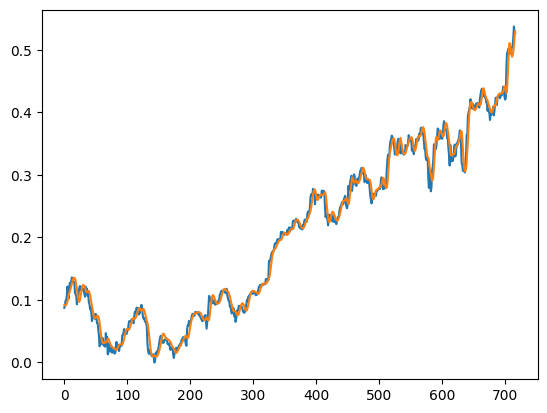

In [ ]:
#plot to compare train and test

plt.plot(y_train)
plt.plot(train_predict)
plt.show()

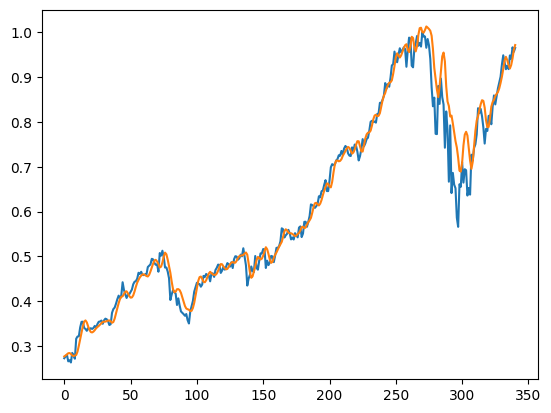

In [ ]:
#plot for test data
plt.plot(y_test)
plt.plot(test_predict)
plt.show()

In [ ]:
x_test[0]

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [ ]:
df.shape

(1258,)

In [ ]:
test_predict[len(test_predict)-1]

array([0.97143257], dtype=float32)

In [ ]:
df[len(df)-1]

np.float64(318.89)

## Apply model for prediction

In [ ]:
y_test1 = scaler.inverse_transform([y_test])

In [ ]:
y_test1

array([[154.94 , 155.86 , 156.82 , 153.3  , 153.92 , 152.7  , 157.76 ,
        156.3  , 154.68 , 165.25 , 166.44 , 166.52 , 171.25 , 174.18 ,
        174.24 , 170.94 , 170.41 , 169.43 , 170.89 , 170.18 , 170.8  ,
        170.42 , 170.93 , 172.03 , 171.06 , 172.97 , 174.23 , 174.33 ,
        174.87 , 173.15 , 174.97 , 175.85 , 175.53 , 174.52 , 172.5  ,
        172.91 , 178.9  , 180.91 , 181.71 , 183.73 , 186.12 , 188.02 ,
        186.53 , 188.16 , 195.09 , 191.05 , 188.74 , 186.79 , 188.47 ,
        188.72 , 189.95 , 191.24 , 194.02 , 195.35 , 195.69 , 197.   ,
        200.1  , 199.5  , 200.62 , 198.95 , 198.87 , 199.23 , 199.25 ,
        203.13 , 203.86 , 204.53 , 207.48 , 207.16 , 205.28 , 204.3  ,
        204.61 , 200.67 , 210.52 , 209.15 , 211.75 , 208.48 , 202.86 ,
        202.9  , 200.72 , 197.18 , 185.72 , 188.66 , 190.92 , 190.08 ,
        189.   , 183.09 , 186.6  , 182.78 , 179.66 , 178.97 , 178.23 ,
        177.38 , 178.3  , 175.07 , 173.3  , 179.64 , 182.54 , 185.22 ,
      

In [ ]:
y_test1 = y_test1.flatten()

In [ ]:
y_test1[len(y_test1)-1], test_predict[len(test_predict)-1]

(np.float64(318.89), array([0.97143257], dtype=float32))

In [ ]:
test_predict1 = scaler.inverse_transform(test_predict).flatten()

In [ ]:
print("Last 100 days data: \n", x_test[len(x_test)-1])
print("Actual Stock Price : ",y_test1[len(y_test1)-1])
print("Model Predicted: ", test_predict1[len(test_predict1)-1])

Last 100 days data: 
 [[0.84936249]
 [0.85835515]
 [0.8866419 ]
 [0.87431394]
 [0.88431985]
 [0.87836697]
 [0.8986321 ]
 [0.92582116]
 [0.92877649]
 [0.95676771]
 [0.93869797]
 [0.93304061]
 [0.94950604]
 [0.96424048]
 [0.95512117]
 [0.95989192]
 [0.96635143]
 [0.96246728]
 [0.92295027]
 [0.9598497 ]
 [0.98792536]
 [0.98594106]
 [0.92531453]
 [0.92172591]
 [0.96474711]
 [0.97572406]
 [0.99159841]
 [0.96972895]
 [0.97614625]
 [0.96795575]
 [1.        ]
 [0.99016297]
 [0.99050072]
 [0.96538039]
 [0.98488559]
 [0.97086887]
 [0.94026007]
 [0.87748037]
 [0.83483915]
 [0.85413324]
 [0.77336823]
 [0.77269273]
 [0.88014017]
 [0.84007431]
 [0.89673225]
 [0.85527316]
 [0.83884995]
 [0.74233725]
 [0.82327113]
 [0.78143207]
 [0.6665963 ]
 [0.7921557 ]
 [0.64118044]
 [0.68614371]
 [0.66001013]
 [0.65203074]
 [0.58642236]
 [0.56586169]
 [0.66089673]
 [0.65515494]
 [0.70970193]
 [0.66452757]
 [0.69437642]
 [0.69218104]
 [0.63569197]
 [0.65266402]
 [0.63780292]
 [0.7267162 ]
 [0.71388162]
 [0.74191506